# Étape 03 – Génération des spectrogrammes (STFT)

Ce notebook applique la STFT sur les fenêtres temporelles (étape 02) pour
générer des spectrogrammes 2D (Ax, Ay, Az) et les sauvegarder en images PNG
dans `data/04_spectrograms/sain` et `data/04_spectrograms/balourd`.


In [17]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve().parent

print("PROJECT_ROOT =", PROJECT_ROOT)

# Chemin vers src/
SRC_DIR = PROJECT_ROOT / "src"
print("SRC_DIR =", SRC_DIR)

sys.path.append(str(SRC_DIR))

from step_03_spectrogram_generation.spectrogram_utils import (
    compute_stft_spectrogram,
    save_spectrogram_png,
    ensure_output_dirs
)

# chemins des données
DATA_DIR = PROJECT_ROOT / "data"
WINDOWED_DIR = DATA_DIR / "03_windowed"
SPEC_DIR = DATA_DIR / "04_spectrograms"

SPEC_DIR


PROJECT_ROOT = C:\Users\douni\Desktop\predictive-maintenance-ai
SRC_DIR = C:\Users\douni\Desktop\predictive-maintenance-ai\src


WindowsPath('C:/Users/douni/Desktop/predictive-maintenance-ai/data/04_spectrograms')

In [18]:
X_path = PROJECT_ROOT / "data" / "03_windowed" / "X_windows.npy"
y_path = PROJECT_ROOT / "data" / "03_windowed" / "y_labels.npy"

X = np.load(X_path)   # shape attendu : (797, 400, 6)
y = np.load(y_path)   # shape attendu : (797,)

X.shape, y.shape


((797, 400, 6), (797,))

In [19]:
n_windows, n_samples, n_channels = X.shape
print(f"Nombre de fenêtres : {n_windows}")
print(f"Longueur d'une fenêtre : {n_samples} échantillons")
print(f"Nombre de canaux : {n_channels}")

# fréquence d'échantillonnage déduite (2 secondes, 400 échantillons)
WINDOW_DURATION_S = 2.0
fs = n_samples / WINDOW_DURATION_S
print(f"Fréquence d'échantillonnage estimée : {fs} Hz")

# 0 = sain, 1 = balourd (d'après README et step 02)
unique, counts = np.unique(y, return_counts=True)
print("Répartition des labels (0=sain, 1=balourd) :")
for lbl, cnt in zip(unique, counts):
    print(f"  label {lbl} : {cnt} fenêtres")


Nombre de fenêtres : 797
Longueur d'une fenêtre : 400 échantillons
Nombre de canaux : 6
Fréquence d'échantillonnage estimée : 200.0 Hz
Répartition des labels (0=sain, 1=balourd) :
  label 0 : 551 fenêtres
  label 1 : 246 fenêtres


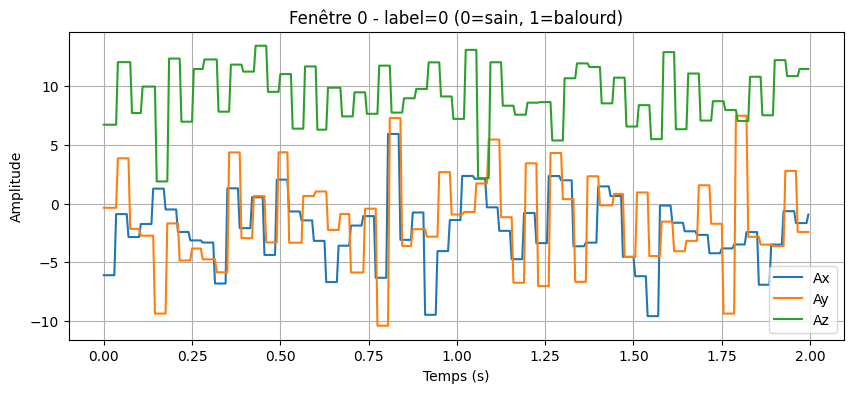

In [20]:
idx_example = 0  # on peut changer pour voir d'autres fenêtres
window = X[idx_example]   # shape (400, 6)
label = y[idx_example]

time = np.linspace(0, WINDOW_DURATION_S, n_samples, endpoint=False)

plt.figure(figsize=(10, 4))
plt.plot(time, window[:, 0], label="Ax")
plt.plot(time, window[:, 1], label="Ay")
plt.plot(time, window[:, 2], label="Az")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title(f"Fenêtre {idx_example} - label={label} (0=sain, 1=balourd)")
plt.legend()
plt.grid(True)
plt.show()


Shape du spectrogramme : (129, 1)


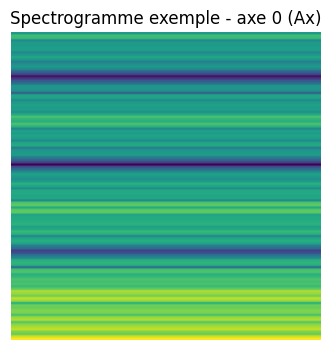

In [21]:
axis_idx = 0   # 0=Ax, 1=Ay, 2=Az
sig_example = window[:, axis_idx]

spec_example = compute_stft_spectrogram(sig_example, fs=fs, n_fft=256)
print("Shape du spectrogramme :", spec_example.shape)

plt.figure(figsize=(4, 4))
plt.imshow(spec_example, aspect="auto", origin="lower", cmap="viridis")
plt.title(f"Spectrogramme exemple - axe {axis_idx} (Ax)")
plt.axis("off")
plt.show()


In [22]:
def generate_all_spectrograms(X, y, out_dir: Path,
                              fs: float = 200.0,
                              n_fft: int = 256):
    """
    Génère les spectrogrammes PNG pour toutes les fenêtres.

    - X : tableau (N_fenêtres, N_samples, N_channels)
    - y : labels (0 = sain, 1 = balourd)
    - out_dir : data/04_spectrograms
    - fs : fréquence d'échantillonnage
    - n_fft : taille STFT (nperseg)
    """

    ensure_output_dirs(out_dir)

    axes_names = ["Ax", "Ay", "Az"]
    axes_idx = [0, 1, 2]  # colonnes 0,1,2 dans X (vibrations ax, ay, az)

    for i in range(X.shape[0]):
        window = X[i]
        label = y[i]

        # choisir le bon dossier selon label
        if label == 0:
            target_folder = out_dir / "sain"
        else:
            target_folder = out_dir / "balourd"

        for axis_name, idx in zip(axes_names, axes_idx):
            sig = window[:, idx]

            spec_db = compute_stft_spectrogram(
                sig,
                fs=fs,
                n_fft=n_fft,
            )

            filename = f"window_{i:04d}_{axis_name}.png"
            filepath = target_folder / filename

            save_spectrogram_png(spec_db, filepath)

        if i % 50 == 0:
            print(f"[INFO] Fenêtre {i}/{X.shape[0]} traitée...")

    print("✅ Génération des spectrogrammes terminée.")


In [23]:
generate_all_spectrograms(X, y, SPEC_DIR, fs=fs, n_fft=256)


[INFO] Fenêtre 0/797 traitée...
[INFO] Fenêtre 50/797 traitée...
[INFO] Fenêtre 100/797 traitée...
[INFO] Fenêtre 150/797 traitée...
[INFO] Fenêtre 200/797 traitée...
[INFO] Fenêtre 250/797 traitée...
[INFO] Fenêtre 300/797 traitée...
[INFO] Fenêtre 350/797 traitée...
[INFO] Fenêtre 400/797 traitée...
[INFO] Fenêtre 450/797 traitée...
[INFO] Fenêtre 500/797 traitée...
[INFO] Fenêtre 550/797 traitée...
[INFO] Fenêtre 600/797 traitée...
[INFO] Fenêtre 650/797 traitée...
[INFO] Fenêtre 700/797 traitée...
[INFO] Fenêtre 750/797 traitée...
✅ Génération des spectrogrammes terminée.


In [24]:
from glob import glob

n_sain = len(glob(str(SPEC_DIR / "sain" / "*.png")))
n_balourd = len(glob(str(SPEC_DIR / "balourd" / "*.png")))

print(f"Images sain    : {n_sain}")
print(f"Images balourd : {n_balourd}")
print(f"Total          : {n_sain + n_balourd} (attendu : {X.shape[0] * 3} car 3 axes)")


Images sain    : 1653
Images balourd : 738
Total          : 2391 (attendu : 2391 car 3 axes)
